In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Import our input dataset
soup_df = pd.read_csv('charity_data.csv')
soup_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
#check if EIN number is unique for each campaign
unique_ein = soup_df["EIN"].unique()
len(unique_ein)

34299

In [4]:
# change index to column EIN
soup_df = soup_df.set_index(['EIN'])
soup_df

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,,,
10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...
996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0


In [5]:
#Drop unimportant values
soup_df = soup_df.drop(['NAME','STATUS'], axis=1)
soup_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
EIN,,,,,,,,,
10520599,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
10531628,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
10547893,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
10553066,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
10556103,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
996009318,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
996010315,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
996012607,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0


In [6]:
# Generate our categorical variable list
soup_cat = soup_df.dtypes[soup_df.dtypes == "object"].index.tolist()

In [7]:
# Check the number of unique values in each column
soup_df[soup_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [8]:
## Print out the Country value counts
app_counts = soup_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Determine which values to replace
replace_app = list(app_counts[app_counts < 500].index)

# Replace in DataFrame
for application in replace_app:
    soup_df.APPLICATION_TYPE = soup_df.APPLICATION_TYPE.replace(application,"Other Application")


# Check to make sure binning was successful
soup_df.APPLICATION_TYPE.value_counts()

T3                   27037
T4                    1542
T6                    1216
T5                    1173
T19                   1065
T8                     737
T7                     725
T10                    528
Other Application      276
Name: APPLICATION_TYPE, dtype: int64

In [10]:
## Print out the Country value counts
class_counts = soup_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1245        1
C4120        1
C1728        1
C4200        1
C2170        1
Name: CLASSIFICATION, Length: 71, dtype: int64

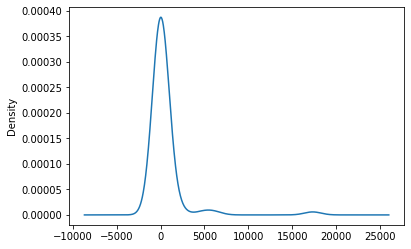

In [11]:
# Visualize the value counts
class_counts.plot.density()

In [12]:
# Determine which values to replace
replace_class = list(class_counts[class_counts < 500].index)

# Replace in DataFrame
for classification in replace_class:
    soup_df.CLASSIFICATION = soup_df.CLASSIFICATION.replace(classification,"Other Classification")


# Check to make sure binning was successful
soup_df.CLASSIFICATION.value_counts()

C1000                   17326
C2000                    6074
C1200                    4837
C3000                    1918
C2100                    1883
Other Classification     1484
C7000                     777
Name: CLASSIFICATION, dtype: int64

In [13]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
#use for loop to encode all categorical variables
for cat_column in soup_cat:
    encode_df = pd.DataFrame(enc.fit_transform(soup_df[cat_column].values.reshape(-1,1)), index = soup_df.index)
    # Rename encoded columns
    encode_df.columns = enc.get_feature_names([cat_column])
    # Merge the two DataFrames together and drop the Country column
    soup_df = soup_df.merge(encode_df,left_index=True,right_index=True).drop(cat_column,1)
soup_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other Application,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10531628,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10547893,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10553066,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10556103,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996009318,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996010315,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996012607,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
amt_counts = soup_df.ASK_AMT.value_counts()
amt_counts


5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

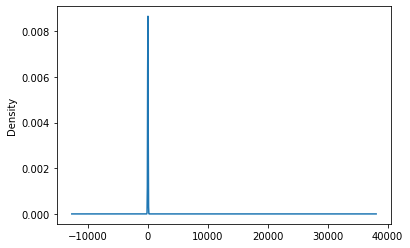

In [15]:
amt_counts.plot.density()

In [16]:
soup_df.ASK_AMT.describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [17]:
#split ASK_AMT into bins
groups = [0, 5000, 8597806340]
new_labels = ["<5000", ">5000"]
soup_df["ASK_AMT"] = pd.cut(soup_df["ASK_AMT"], groups, labels = new_labels)
soup_df

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other Application,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,<5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10531628,>5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10547893,<5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10553066,>5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10556103,>5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996009318,<5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996010315,<5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
996012607,<5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
soup_df.dtypes

ASK_AMT                                category
IS_SUCCESSFUL                             int64
APPLICATION_TYPE_Other Application      float64
APPLICATION_TYPE_T10                    float64
APPLICATION_TYPE_T19                    float64
APPLICATION_TYPE_T3                     float64
APPLICATION_TYPE_T4                     float64
APPLICATION_TYPE_T5                     float64
APPLICATION_TYPE_T6                     float64
APPLICATION_TYPE_T7                     float64
APPLICATION_TYPE_T8                     float64
AFFILIATION_CompanySponsored            float64
AFFILIATION_Family/Parent               float64
AFFILIATION_Independent                 float64
AFFILIATION_National                    float64
AFFILIATION_Other                       float64
AFFILIATION_Regional                    float64
CLASSIFICATION_C1000                    float64
CLASSIFICATION_C1200                    float64
CLASSIFICATION_C2000                    float64
CLASSIFICATION_C2100                    

In [19]:
soup_df = pd.get_dummies(soup_df, columns = ['ASK_AMT'])

In [20]:
#Drop SPECIAL_CONSIDERATIONS_N as it just opposite for SPECIAL_CONSIDERATIONS_Y and don't contain any new information
soup_df = soup_df.drop(['SPECIAL_CONSIDERATIONS_N'], axis=1)
soup_df

,IS_SUCCESSFUL,APPLICATION_TYPE_Other Application,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_<5000,ASK_AMT_>5000
EIN,,,,,,,,,,,,,,,,,,,,,
10520599,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
10531628,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
10547893,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
10553066,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
10556103,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996009318,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
996010315,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
996012607,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [21]:
#Check if there is inactive campaign
#status_counts = soup_df.STATUS.value_counts()
#status_counts

In [22]:
#Split the data into features and target arrays
y = soup_df['IS_SUCCESSFUL'].values
X = soup_df.drop(['IS_SUCCESSFUL'],1).values

In [23]:
#Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 75)

In [24]:
#Standardize the numerical features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
#Build a Deep Learning Model
#Define the model
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 5
nn = tf.keras.models.Sequential()

In [26]:
#First Layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1,
                     input_dim = number_input_features, activation ="relu"))

In [27]:
#Second Layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation ="relu"))

In [28]:
#Third Layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer3, activation ="sigmoid"))

In [29]:
#Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation ="sigmoid"))

In [30]:
#Check summary
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,151
Trainable params: 1,151
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [32]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 5s 177us/sample - loss: 0.6085 - accuracy: 0.6969
Epoch 2/50
25724/25724 [==============================] - 2s 79us/sample - loss: 0.5734 - accuracy: 0.7274
Epoch 3/50
25724/25724 [==============================] - 2s 81us/sample - loss: 0.5662 - accuracy: 0.7259
Epoch 4/50
25724/25724 [==============================] - 2s 74us/sample - loss: 0.5602 - accuracy: 0.7285
Epoch 5/50
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5573 - accuracy: 0.7271
Epoch 6/50
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5557 - accuracy: 0.7287
Epoch 7/50
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5543 - accuracy: 0.7278
Epoch 8/50
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5528 - accuracy: 0.7297
Epoch 9/50
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5522 - accuracy: 0.7301
Epoch 10/50
2

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5453 - accuracy: 0.7383
Loss: 0.5469998520664849, Accuracy: 0.7383090257644653
